/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8388 - loss: 0.3844 - val_accuracy: 0.9908 - val_loss: 0.0305
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9880 - loss: 0.0345 - val_accuracy: 0.9969 - val_loss: 0.0119
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9975 - loss: 0.0129 - val_accuracy: 0.9977 - val_loss: 0.0055
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9996 - loss: 0.0046 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9998 - loss: 0.0025 - val_accuracy: 1.0000 - val_loss: 6.4821e-04
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9989 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 8.3884e-04
Epoch 7/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 9.1711e-04
Epoch 8/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9996 - loss: 0.0012 - val_

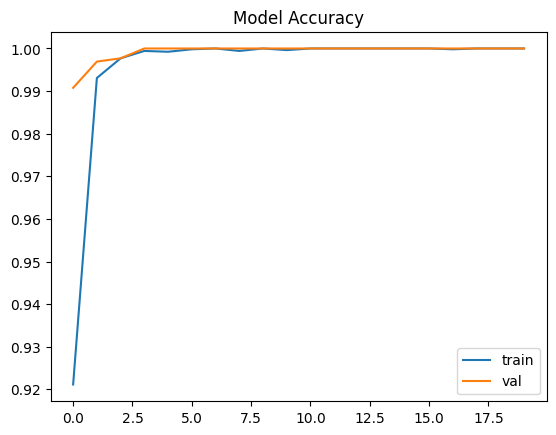

In [1]:
# Завданння 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# === 1. Завантаження та підготовка даних ===
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
columns = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
           'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape',
           'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
           'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type',
           'veil-color', 'ring-number', 'ring-type', 'spore-print-color',
           'population', 'habitat']

df = pd.read_csv(url, header=None, names=columns)

# Кодування цільової змінної (class: e=edible, p=poisonous)
le = LabelEncoder()
y = le.fit_transform(df['class']) # 0 або 1

# Кодування ознак (One-Hot Encoding для категорильних змінних)
X = pd.get_dummies(df.drop('class', axis=1), drop_first=True)

# Розділення на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === 2. Побудова нейронної мережі ===
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3), # Регуляризація
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid') # Бінарна класифікація
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# === 3. Навчання ===
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# === 4. Оцінка та порівняння ===
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Random Forest)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_acc = accuracy_score(y_test, rf.predict(X_test))
print(f"Random Forest Accuracy: {rf_acc:.4f}")

# Графік навчання
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Model Accuracy')
plt.legend()
plt.show()

Завантаження датасету Beans...


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/beans/incomplete.7CYFAL_0.1.0/beans-train.tfrecord*...:   0%|          | 0…

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/beans/incomplete.7CYFAL_0.1.0/beans-validation.tfrecord*...:   0%|        …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/beans/incomplete.7CYFAL_0.1.0/beans-test.tfrecord*...:   0%|          | 0/…

Dataset beans downloaded and prepared to /root/tensorflow_datasets/beans/0.1.0. Subsequent calls will reuse this data.
Класи: ['angular_leaf_spot', 'bean_rust', 'healthy']

--- Навчання простої CNN ---
Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 136s 4s/step - accuracy: 0.4196 - loss: 1.2883 - val_accuracy: 0.6692 - val_loss: 0.7995
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 114s 3s/step - accuracy: 0.6119 - loss: 0.8965 - val_accuracy: 0.6241 - val_loss: 0.8375
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 113s 3s/step - accuracy: 0.6844 - loss: 0.7636 - val_accuracy: 0.6992 - val_loss: 0.6115
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 115s 3s/step - accuracy: 0.7296 - loss: 0.6608 - val_accuracy: 0.7444 - val_loss: 0.5786
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 112s 3s/step - accuracy: 0.7538 - loss: 0.5989 - val_accuracy: 0.7594 - val_loss: 0.5338
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 123s 4s/step - accuracy: 0.8059 - loss: 0.5074 - val_accuracy: 0.7970 - val_loss: 0.5254
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━

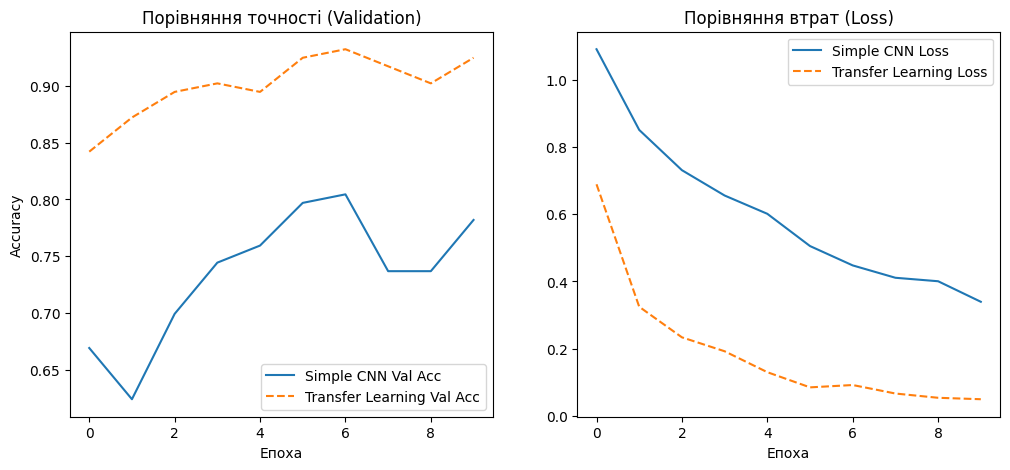

In [2]:
#Завдання 2
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.applications import MobileNetV2

# ==========================================
# 1. ЗАВАНТАЖЕННЯ ТА ПІДГОТОВКА ДАНИХ
# ==========================================
print("Завантаження датасету Beans...")
# Завантажуємо датасет (він сам скачається і кешується)
(ds_train, ds_val, ds_test), ds_info = tfds.load(
    'beans',
    split=['train', 'validation', 'test'],
    shuffle_files=True,
    as_supervised=True, # Повертає кортежі (image, label)
    with_info=True
)

# Параметри
IMG_SIZE = 224 # Розмір для MobileNet
BATCH_SIZE = 32
NUM_CLASSES = 3

# Функція препроцесингу
def preprocess(image, label):
    # Змінюємо розмір картинки під стандарт 224x224
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    # Нормалізація пікселів до діапазону [0, 1]
    image = image / 255.0
    # Перетворюємо мітку класу в one-hot вектор (наприклад, 2 -> [0, 0, 1])
    label = tf.one_hot(label, depth=NUM_CLASSES)
    return image, label

# Застосовуємо обробку до потоків даних (pipeline)
# .cache() - тримає дані в пам'яті для швидкості
# .prefetch() - готує наступний батч, поки GPU рахує поточний
train_data = ds_train.map(preprocess).cache().shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val_data = ds_val.map(preprocess).cache().batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_data = ds_test.map(preprocess).cache().batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

print(f"Класи: {ds_info.features['label'].names}")

# ==========================================
# 2а. ПРОСТА ЗГОРТКОВА МЕРЕЖА (Simple CNN)
# ==========================================
print("\n--- Навчання простої CNN ---")

model_simple = Sequential([
    Input(shape=(IMG_SIZE, IMG_SIZE, 3)),
    # 1-й блок згортки
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    # 2-й блок згортки
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    # 3-й блок згортки
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Класифікатор
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5), # Щоб менше перенавчалась
    Dense(NUM_CLASSES, activation='softmax')
])

model_simple.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Навчаємо (10 епох вистачить для демонстрації)
history_simple = model_simple.fit(
    train_data,
    epochs=10,
    validation_data=val_data,
    verbose=1
)

# ==========================================
# 2б. TRANSFER LEARNING (MobileNetV2)
# ==========================================
print("\n--- Навчання Transfer Learning (MobileNetV2) ---")

# Завантажуємо базову модель без "голови" (include_top=False)
base_model = MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3),
                         include_top=False,
                         weights='imagenet')

# "Заморожуємо" ваги, щоб не псувати те, що модель вже вивчила
base_model.trainable = False

# Створюємо нову голову
inputs = Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x) # Замість Flatten, краще для сучасних мереж
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
outputs = Dense(NUM_CLASSES, activation='softmax')(x)

model_transfer = Model(inputs, outputs)

model_transfer.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_transfer = model_transfer.fit(
    train_data,
    epochs=10, # MobileNet вчиться дуже швидко
    validation_data=val_data,
    verbose=1
)

# ==========================================
# 3. ПОРІВНЯННЯ ТА ВІЗУАЛІЗАЦІЯ
# ==========================================

# Оцінка на тестових даних
acc_simple = model_simple.evaluate(test_data)[1]
acc_transfer = model_transfer.evaluate(test_data)[1]

print(f"\nТочність простої CNN на тесті: {acc_simple:.2%}")
print(f"Точність Transfer Learning на тесті: {acc_transfer:.2%}")

# Графіки
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_simple.history['val_accuracy'], label='Simple CNN Val Acc')
plt.plot(history_transfer.history['val_accuracy'], label='Transfer Learning Val Acc', linestyle='--')
plt.title('Порівняння точності (Validation)')
plt.xlabel('Епоха')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_simple.history['loss'], label='Simple CNN Loss')
plt.plot(history_transfer.history['loss'], label='Transfer Learning Loss', linestyle='--')
plt.title('Порівняння втрат (Loss)')
plt.xlabel('Епоха')
plt.legend()

plt.show()

Завантаження датасетів з GitHub...
Всього жартів: 20000
Приклад жарту: With so much turmoil in the world, God decided to pay a visit to earth to check things out. He strol...

--- Навчання Моделі А (Власний Embedding) ---
Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


500/500 ━━━━━━━━━━━━━━━━━━━━ 261s 512ms/step - accuracy: 0.8531 - loss: 0.3381 - val_accuracy: 0.9185 - val_loss: 0.2031
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 262s 513ms/step - accuracy: 0.9414 - loss: 0.1639 - val_accuracy: 0.9197 - val_loss: 0.1968
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 259s 519ms/step - accuracy: 0.9690 - loss: 0.0921 - val_accuracy: 0.9093 - val_loss: 0.2488
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 257s 510ms/step - accuracy: 0.9741 - loss: 0.0765 - val_accuracy: 0.9125 - val_loss: 0.2425
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 264s 514ms/step - accuracy: 0.9860 - loss: 0.0469 - val_accuracy: 0.9110 - val_loss: 0.3447
--2025-12-14 15:20:18--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-12-14 15:20:18--  htt

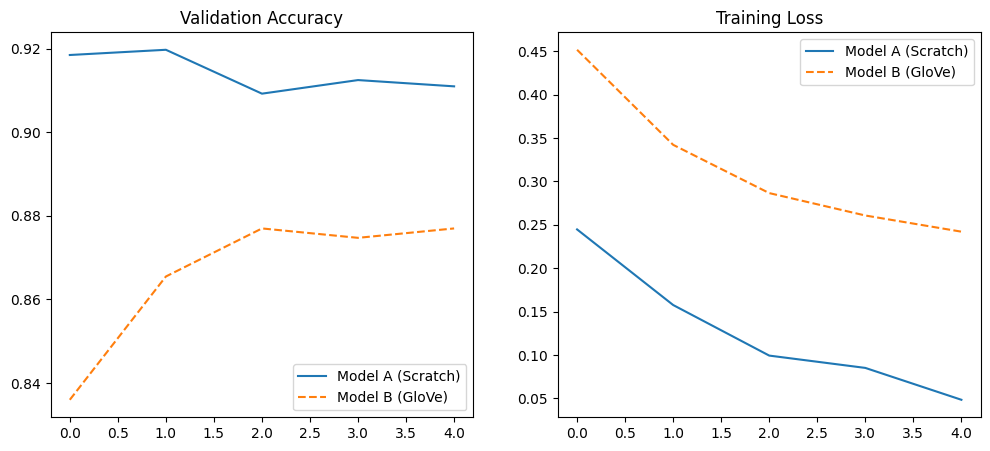

Точність Model A (Scratch): 0.9110
Точність Model B (GloVe): 0.8770


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from sklearn.model_selection import train_test_split

# ==========================================
# 1. ЗАВАНТАЖЕННЯ ДАНИХ
# ==========================================
print("Завантаження датасетів з GitHub...")

# Правильні посилання
url_reddit = "https://raw.githubusercontent.com/taivop/joke-dataset/master/reddit_jokes.json"
url_waka = "https://raw.githubusercontent.com/taivop/joke-dataset/master/wocka.json"

# Читаємо файли
df_reddit = pd.read_json(url_reddit)
df_waka = pd.read_json(url_waka)

# Створюємо мітки (labels): 0 - Reddit, 1 - Waka
df_reddit['label'] = 0
df_waka['label'] = 1

# Для швидкості та балансу візьмемо по 10,000 жартів з кожного
sample_size = 10000
df = pd.concat([
    df_reddit.sample(sample_size, random_state=42),
    df_waka.sample(min(len(df_waka), sample_size), random_state=42)
], ignore_index=True)

# Перемішуємо
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

texts = df['body'].astype(str).tolist()
labels = df['label'].values

print(f"Всього жартів: {len(texts)}")
print(f"Приклад жарту: {texts[0][:100]}...")

# ==========================================
# 2. ПРЕПРОЦЕСИНГ (ТОКЕНІЗАЦІЯ)
# ==========================================
VOCAB_SIZE = 10000  # Кількість слів у словнику
MAX_LENGTH = 400    # Максимальна довжина жарту
EMBEDDING_DIM = 100 # Розмірність векторів (для GloVe 100d)

tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)

# Перетворення тексту в послідовність чисел
sequences = tokenizer.texts_to_sequences(texts)
padded = pad_sequences(sequences, maxlen=MAX_LENGTH, padding='post', truncating='post')

# Розбиття на train/test
X_train, X_test, y_train, y_test = train_test_split(padded, labels, test_size=0.2, random_state=42)

# ==========================================
# 3а. МОДЕЛЬ А: ВЛАСНИЙ EMBEDDING
# ==========================================
print("\n--- Навчання Моделі А (Власний Embedding) ---")

model_a = Sequential([
    Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LENGTH),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_a.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_a = model_a.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=32, verbose=1)

# ==========================================
# 3б. МОДЕЛЬ Б: GLOVE EMBEDDINGS
# ==========================================
# Качаємо архів з векторами
!wget --no-check-certificate http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q -o glove.6B.zip # додав -o для перезапису без питань

print("Створення матриці embedding...")
embeddings_index = {}
with open('glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

# Створюємо матрицю ваг
embedding_matrix = np.zeros((VOCAB_SIZE, EMBEDDING_DIM))
for word, i in tokenizer.word_index.items():
    if i < VOCAB_SIZE:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

print("\n--- Навчання Моделі Б (GloVe Pre-trained) ---")

model_b = Sequential([
    Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LENGTH,
              weights=[embedding_matrix], trainable=False),
    Bidirectional(LSTM(64)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_b.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_b = model_b.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=32, verbose=1)

# ==========================================
# 4. ПОРІВНЯННЯ
# ==========================================
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_a.history['val_accuracy'], label='Model A (Scratch)')
plt.plot(history_b.history['val_accuracy'], label='Model B (GloVe)', linestyle='--')
plt.title('Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_a.history['loss'], label='Model A (Scratch)')
plt.plot(history_b.history['loss'], label='Model B (GloVe)', linestyle='--')
plt.title('Training Loss')
plt.legend()

plt.show()

print(f"Точність Model A (Scratch): {model_a.evaluate(X_test, y_test, verbose=0)[1]:.4f}")
print(f"Точність Model B (GloVe): {model_b.evaluate(X_test, y_test, verbose=0)[1]:.4f}")